In [1]:
import numpy as np
import pandas as pd 
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [5]:
def fun(x, time: np.array, profit: np.array):
            return x[0] + (x[1] + x[2]) * (x[3] / time) * (1 - np.exp(- time / x[3])) - x[2] * np.exp(- time / x[3]) - profit

Times = np.array([0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

Profits = np.array([5.69,5.76,5.88,6.03,6.13,6.26,6.37,6.5])

res_lsq = least_squares(fun, np.array([1., 1., 1., 1.]), args=(Times, 100* Profits))

In [6]:
res_lsq

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 1.907e+00  2.212e-01 -2.251e+00 -1.841e+00 -1.529e-01
                2.809e+00  1.711e+00 -2.404e+00]
           x: [ 6.708e+02 -1.056e+02  3.381e-04  2.223e+00]
        cost: 14.380463040156526
         jac: [[ 1.000e+00  9.458e-01  5.219e-02 -2.481e+00]
               [ 1.000e+00  8.955e-01  9.696e-02 -4.608e+00]
               ...
               [ 1.000e+00  3.039e-01  2.610e-01 -1.241e+01]
               [ 1.000e+00  2.198e-01  2.087e-01 -9.917e+00]]
        grad: [ 1.439e-07 -3.386e-07 -1.175e-05 -1.345e-05]
  optimality: 1.345348917602962e-05
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 56
        njev: 37

In [7]:
df = pd.read_csv('Data/FedYeildCurve1DayMonth.csv')

In [13]:
df = df.drop('Unnamed: 0', axis=1)

In [20]:
df.shape

(84, 9)

In [ ]:
beta0 = np.array([])
beta1 = np.array([])
beta2 = np.array([])

In [33]:
p3   = df["M3"].astype(float)
p6   = df["M6"].astype(float)
p12  = df["Y1"].astype(float)
p24  = df["Y2"].astype(float)
p36  = df["Y3"].astype(float)
p60  = df["Y5"].astype(float)
p84  = df["Y7"].astype(float)
p120 = df["Y10"].astype(float)

cs = open('coefs.csv', 'w+')

for i in range(len(p3)):
    Times = np.array([0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

    Profits = np.array([p3[i], p6[i], p12[i], p24[i], p36[i], p60[i], p84[i], p120[i]])

    res_lsq = least_squares(fun, np.array([1., 1., 1., 1.]), args=(Times, 100 * Profits))

    cs.write(str(i)+', '+str(res_lsq.x[0])+', '+str(res_lsq.x[1])+', '+str(res_lsq.x[2])+', '+str(res_lsq.x[3])+'\n')



In [41]:
data = pd.read_csv("coefs.csv")

In [42]:
data=data.drop(["Unnamed: 0"], axis=1)

array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'tau'}>]], dtype=object)

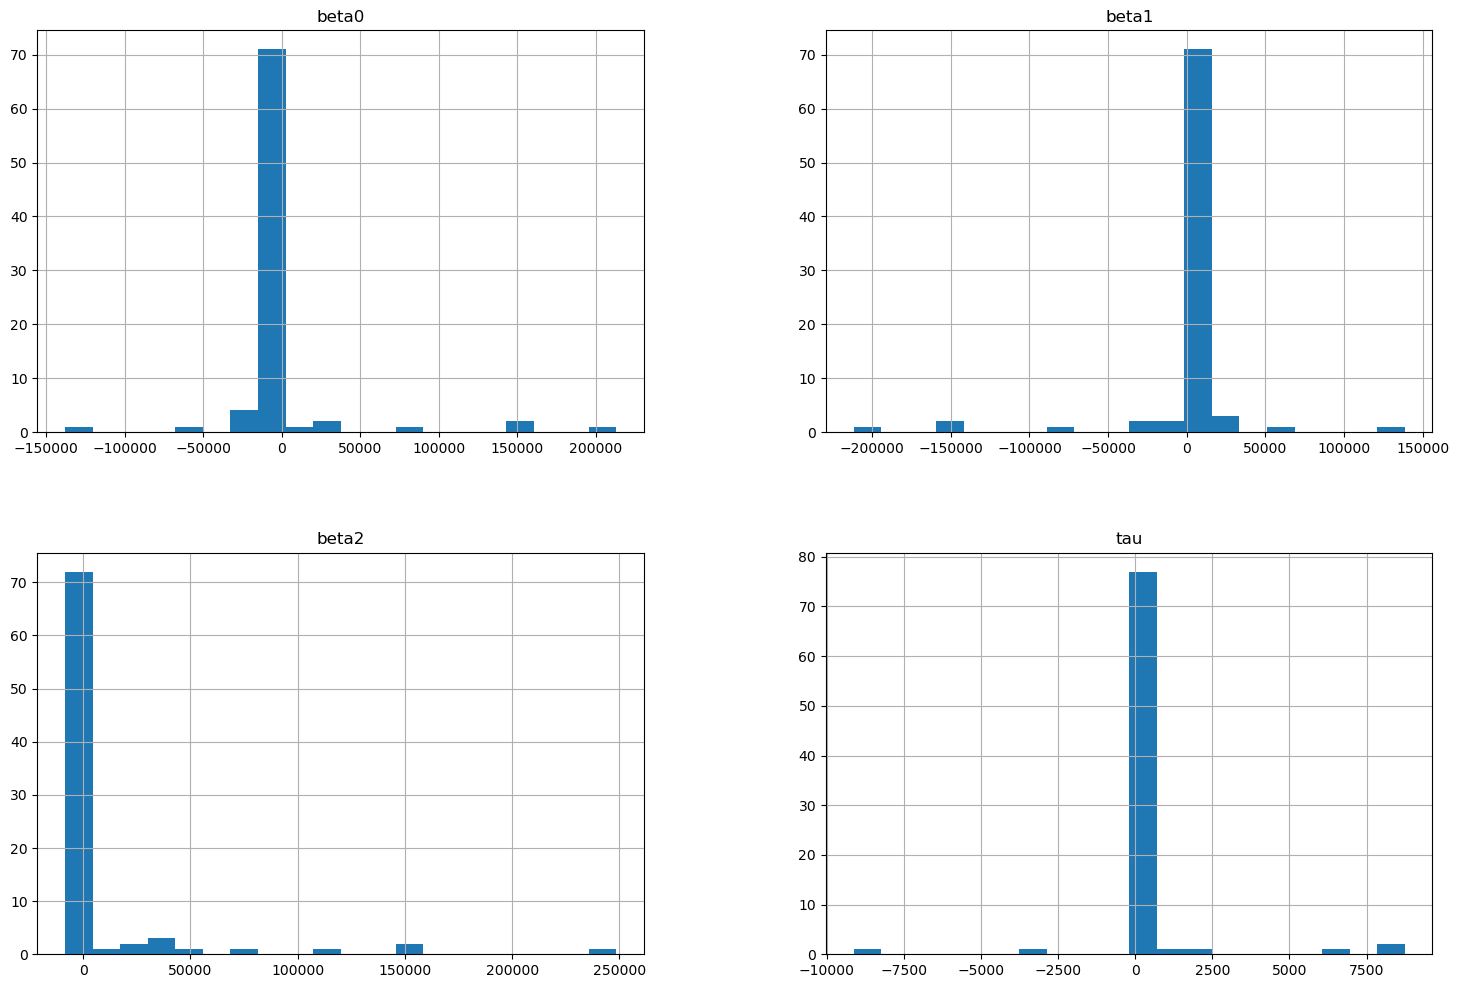

In [43]:
data.iloc[:, :].hist(figsize=(18, 12), bins=20)

In [48]:
data = data.loc[data['beta0'] < 30000]
data = data.loc[data["beta1"] > -50000]
data = data.loc[data["beta2"] < 50000]
data = data.loc[data["tau"] > -2500]

array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'tau'}>]], dtype=object)

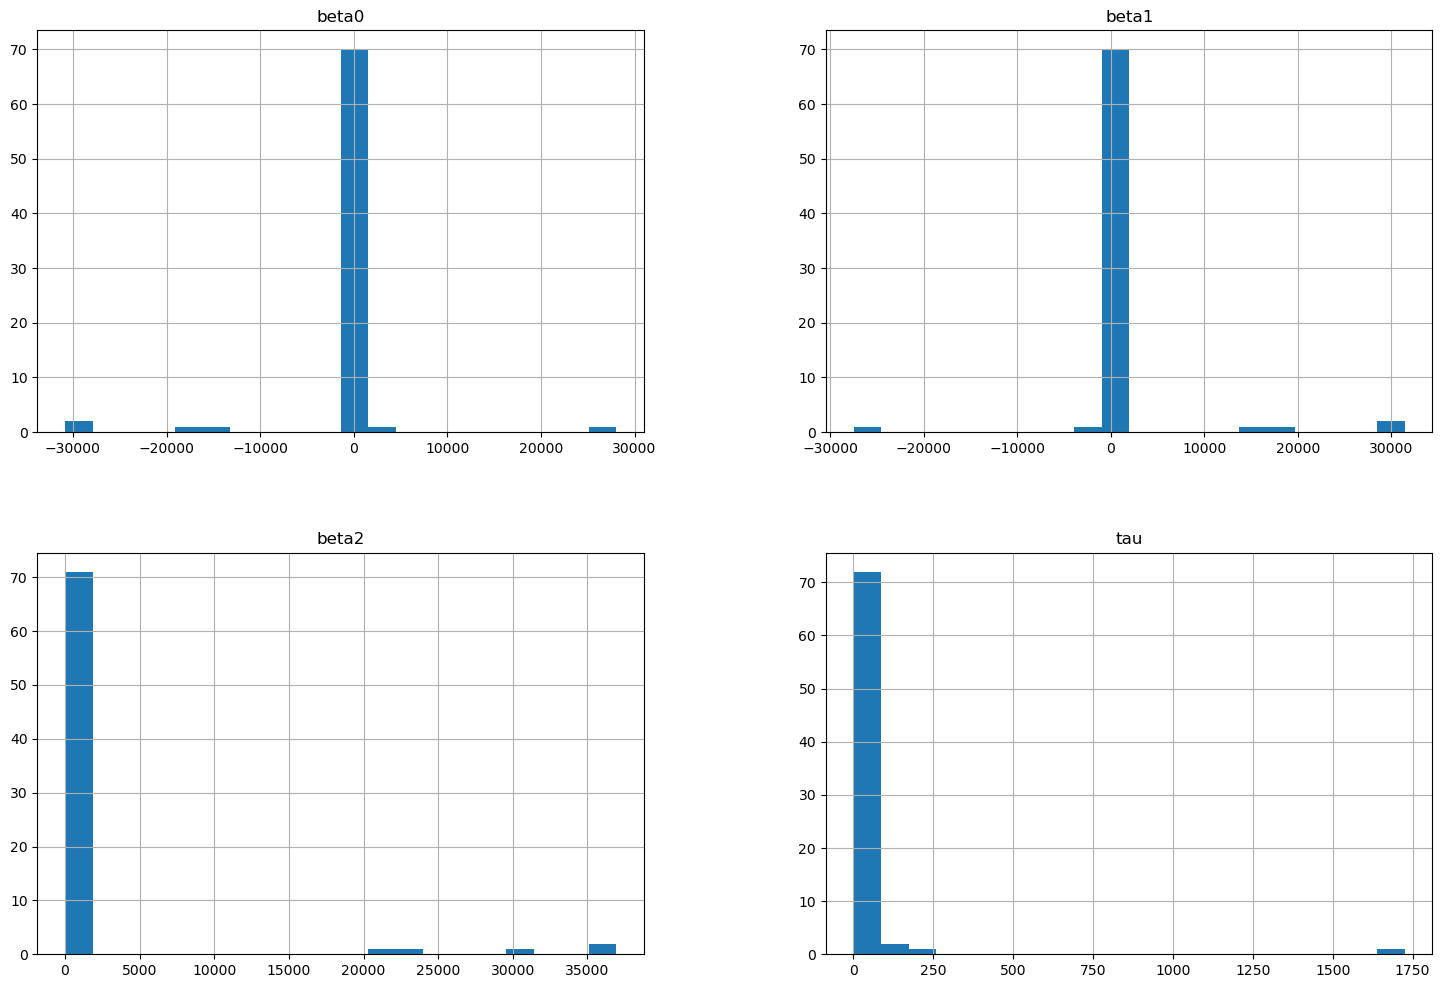

In [50]:
data.iloc[:, :].hist(figsize=(18, 12), bins=20)

In [51]:
data = data.loc[data['beta0'] > -10000]
data = data.loc[data["beta1"] > -50000]
data = data.loc[data["beta2"] < 50000]
data = data.loc[data["tau"] < 250]

array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'tau'}>]], dtype=object)

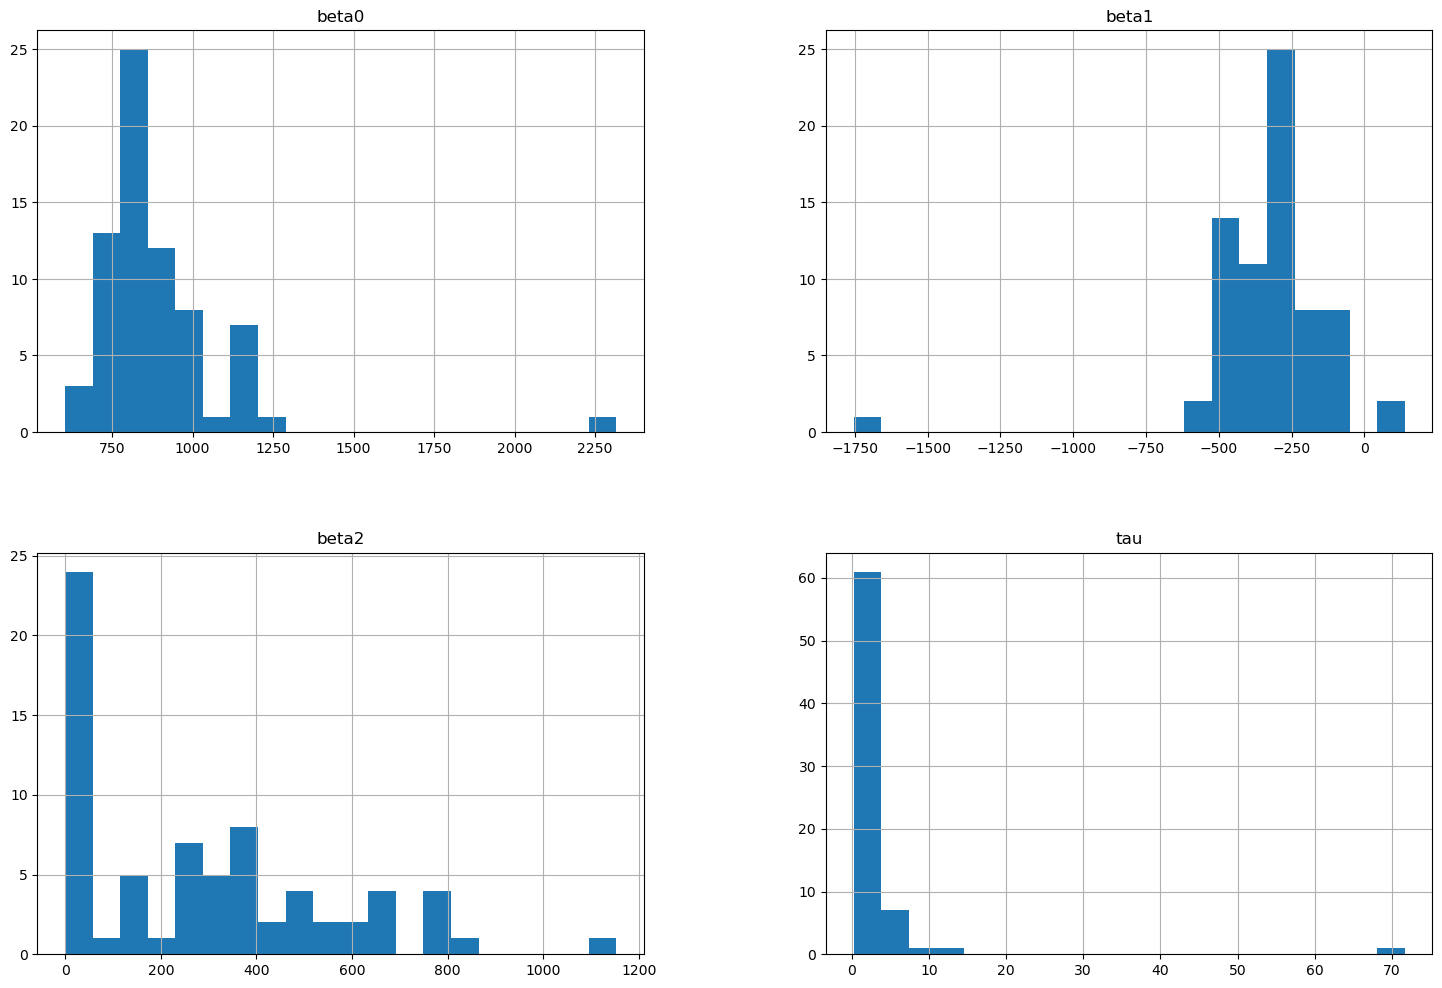

In [54]:
data.iloc[:, :].hist(figsize=(18, 12), bins=20)

In [55]:
data = data.loc[data['beta0'] < 1500]
data = data.loc[data["beta1"] > -740]
data = data.loc[data["beta2"] < 50000]
data = data.loc[data["tau"] < 250]

array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'tau'}>]], dtype=object)

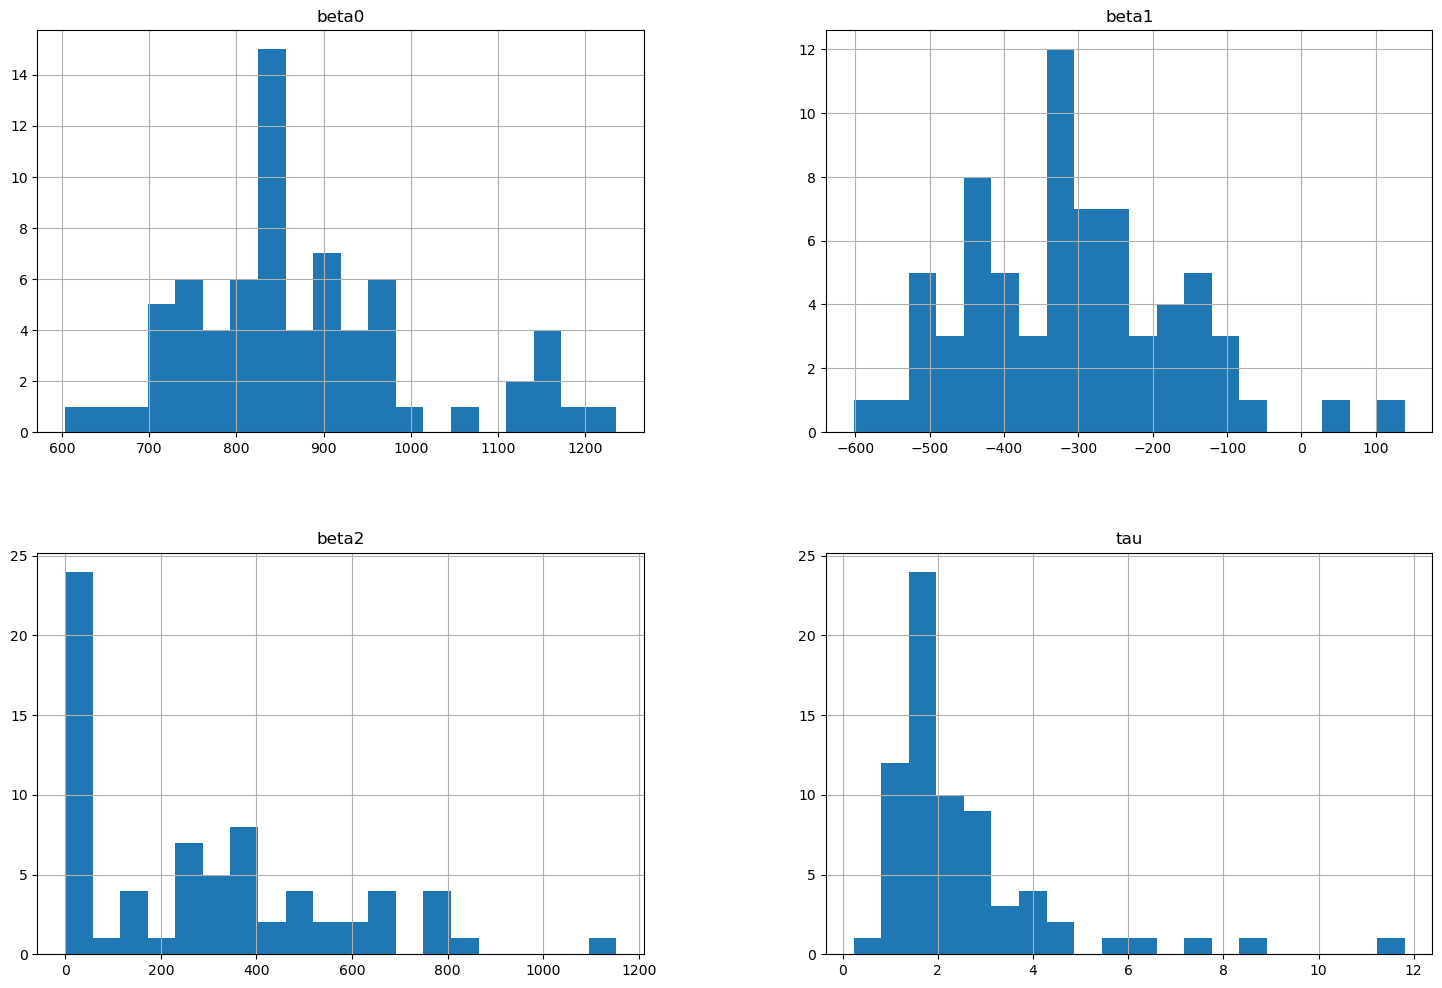

In [56]:
data.iloc[:, :].hist(figsize=(18, 12), bins=20)

In [60]:
data.to_csv('coefsDrops.csv')